# Chargex - Анализ окупаемости терминалов зарядных устройств 📲

## Содержание

1) [Описание проекта](#anchor_1)  
2) [Загрузка данных и подготовка их к анализу](#anchor_2)  
3) [Исследовательский анализ данных (EDA)](#anchor_3)  
4) [Проверка гипотез](#anchor_4)  
5) [Общий вывод и рекомендации](#anchor_5)  
6) [Предложения для дополнительных исследований](#anchor_6)  

---

<a id='anchor_1'></a>
## Описание проекта

Наш заказчик — Chargex — быстро развивающийся сервис зарядки гаджетов с сетью по всей России и за рубежом.

У нас есть трёхсоставные тарифы, всё ещё содержащие загадки данные о 745 236 транзакциях, 219 583 событиях взятия одним из 140 554 пользователем в аренду power bank’а на одной из 905 станций для их выдачи и зарядки, 59 условий, из которых составляются тарифы, а также масса других необработанных технических данных.

**Цель исследования:**

Установить, в каких категориях заведений станции окупаются быстрее.

**Задачи исследования:**

- Необходимо подготовить данные
- проверить их на непротиворечивость и исключить аномалии
- категоризировать заведения, в которых стоят точки для аренды пауер-банка
- посмотреть, в каких из них терминалы для пауер-банков быстрее окупаются
- построить и проверить гипотезы о целевой аудитории заказчика, предложить пути развития бизнеса.

**Ход исследования:**

*Шаг 1.* Загрузка и обзор данных
Загрузить данные. Систематизация таблиц и упорядочивание информации. Построение схемы к данным.

*Шаг 2.* Провести исследовательский анализ данных (EDA)
Сгруппировать данные и объединить в один массив. Изучение пропусков и устранение их. Расчет дополнительных метрик, необходимых для исследования. Первичные выводы на основании описательных характеристик.

*Шаг 3.* Выдвинуть гипотезы для проверки
Произвезти различные группировки, визуализировать результаты. Понаблюдать за поведением ключевых метрик.

*Шаг 4.* Сформулировать выводы и дать базовые рекомендации по продвижению продукта.

*Шаг 5.* Предложить темы для дополнительных исследований

---

<a id='anchor_2'></a>
## Загрузка данных и подготовка их к анализу

Для начала произведём импорт всех необходимых нам библиотек, сделаем некоторые базовые настройки:

In [1]:
# импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy для операций с массивами
import numpy as np

# импорт библиотеки визуализации seaborn
import seaborn as sns

# импорт библиотеки matplotlib для продвинутой работы с графиками
import matplotlib.pyplot as plt

# установим по умолчанию вид отображения вещественных чисел с двумя знаками после запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# зафиксируем число отображаемых колонок, чтобы они не прятались у нас за тремя точками
pd.set_option('display.max_columns', 60)

# импорт библиотеки для вывода схемы базы данных
from IPython.display import Image

# импорт библиотеки для игнорирования предупреждений
import warnings
warnings.filterwarnings("ignore")

В нашем распоряжении оказалось избыточное количество данных. Прежде, чем приступать к исследованию, изучим данные, выделим необходимые, установим взаимосвязи. Поочерёдно считаем каждую таблицу, сохраним в переменную и оставим только необходимые для исследования графы.

Итак, таблица **transactions**:

In [2]:
transactions = pd.read_csv('transactions.csv')
transactions.sample(5)

,_id,createdDate,description,price,rentId,transactionStatus,user._id,user.blocking,user.createdDate,user.roles,user.telegramLoginState,user.webUser
236335,61acb2463f558a2354b884ed,2021-12-05T12:36:22.700Z,tariff period: 1,100.00,61ab60e53f558a2354b87466,CREDIT,619b90dc4fb21d5617c6f2fb,False,2021-11-22T12:45:16.970Z,"[{""role"":""USER""}]",False,True
184336,6159d6c96d515855f55e570c,2021-10-03T16:14:01.577Z,tariff period: 1,100.00,6159d6bd6d515855f55e5707,CREDIT,6159d6bd6d515855f55e5705,False,2021-10-03T16:13:49.764Z,"[{""role"":""USER""}]",False,True
356340,624ec5514fc70b3b14a0bd1c,2022-04-07T11:04:49.241Z,tariff period: 2 credit card: 6626,50.00,624ec54c4fc70b3b14a0bd19,DEBIT,61e16b938898cb7c09423e9f,False,2022-01-14T12:24:51.493Z,"[{""role"":""USER""}]",False,True
81864,60d4a432fd18b13fc8dc6226,2021-06-24T15:26:42.335Z,tariff period: 1,50.00,60d4a422fd18b13fc8dc621f,CREDIT,60d4a3e3fd18b13fc8dc620e,False,2021-06-24T15:25:23.958Z,"[{""role"":""USER""}]",False,True
424143,62a3bf774849e0668a2c0de0,2022-06-10T22:02:31.418Z,tariff period: 1 credit card: 3668,50.00,62a3b1514849e0668a2c0c7b,DEBIT,6262e85cacc7b52f0596986e,False,2022-04-22T17:39:40.448Z,"[{""role"":""USER""}]",False,True


In [3]:
transactions = transactions.rename(columns = {'_id':'id', 'createdDate':'tr_dt', 'rentId':'rent_id', 
                                    'price':'revenue', 'transactionStatus':'tr_status', 'user._id':'user_id'})
transactions.columns

Index(['id', 'tr_dt', 'description', 'revenue', 'rent_id', 'tr_status',
       'user_id', 'user.blocking', 'user.createdDate', 'user.roles',
       'user.telegramLoginState', 'user.webUser'],
      dtype='object')

In [4]:
transactions = transactions[['id', 'tr_dt', 'revenue', 'rent_id', 'tr_status', 'user_id']]
transactions.head()

,id,tr_dt,revenue,rent_id,tr_status,user_id
0,5ece363cab9b814d8716a6f1,2020-05-27T09:43:24.327Z,0.00,5ece363cab9b814d8716a6f0,CREDIT,5ece331eab9b814d8716a6ea
1,5ece45a9ab9b814d8716a704,2020-05-27T10:49:13.373Z,50.00,5ece45a5ab9b814d8716a703,CREDIT,5ece331eab9b814d8716a6ea
2,5ece45a9ab9b814d8716a705,2020-05-27T10:49:13.374Z,50.00,5ece45a5ab9b814d8716a703,DEBIT,5ece331eab9b814d8716a6ea
3,5ecfd910ab9b815292b21713,2020-05-28T15:30:24.921Z,0.00,5ecfd910ab9b815292b21712,CREDIT,5ece331eab9b814d8716a6ea
4,5ed7b00bab9b811856f6cab4,2020-06-03T14:13:31.525Z,0.00,5ed7b00bab9b811856f6cab3,CREDIT,5ece331eab9b814d8716a6ea


Посмотрим общую информацию по получившейся таблице:

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745236 entries, 0 to 745235
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         745236 non-null  object 
 1   tr_dt      745236 non-null  object 
 2   revenue    745236 non-null  float64
 3   rent_id    745236 non-null  object 
 4   tr_status  745236 non-null  object 
 5   user_id    745233 non-null  object 
dtypes: float64(1), object(5)
memory usage: 34.1+ MB


Видим, что пропусков в данных нет (кроме идентификатора пользователя). Приведем столбец о дате транзакции к более удобному формату, а также проверим таблицу на наличие явных дубликатов:

In [6]:
transactions['tr_dt'] = pd.to_datetime(transactions['tr_dt'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
transactions.head()

,id,tr_dt,revenue,rent_id,tr_status,user_id
0,5ece363cab9b814d8716a6f1,2020-05-27 09:43:24.327,0.00,5ece363cab9b814d8716a6f0,CREDIT,5ece331eab9b814d8716a6ea
1,5ece45a9ab9b814d8716a704,2020-05-27 10:49:13.373,50.00,5ece45a5ab9b814d8716a703,CREDIT,5ece331eab9b814d8716a6ea
2,5ece45a9ab9b814d8716a705,2020-05-27 10:49:13.374,50.00,5ece45a5ab9b814d8716a703,DEBIT,5ece331eab9b814d8716a6ea
3,5ecfd910ab9b815292b21713,2020-05-28 15:30:24.921,0.00,5ecfd910ab9b815292b21712,CREDIT,5ece331eab9b814d8716a6ea
4,5ed7b00bab9b811856f6cab4,2020-06-03 14:13:31.525,0.00,5ed7b00bab9b811856f6cab3,CREDIT,5ece331eab9b814d8716a6ea


In [7]:
transactions.duplicated().sum()

0

Посмотрим, транзакции с каким статусом представлены в таблице:

In [8]:
transactions['tr_status'].unique()

array(['CREDIT', 'DEBIT', 'REFUND'], dtype=object)

Получили:  
'CREDIT' – кредитование пользователем своего счёта,  
'DEBIT' – списание денег с пользователя за услуги,  
'REFUND' – возвраты средств.

У нас могут быть ошибочные транзакции, могут не пройти транзакции, которые должны были пройти. Информация о транзакциях - это "кассовая" выручка - сколько мы фактически получили (ключевая метрика для изучения). Таким образом, строки со статусом 'DEBIT' представляют для нас сейчас первостепенный интерес. Посмотрим, каков процент таких операций в общем массиве:

In [9]:
print('Кассовую выручку составляет', round(len(transactions.query('tr_status == "DEBIT"'))*100/len(transactions), 2),
     '% транзакций')

Кассовую выручку составляет 54.91 % транзакций


Перейдём к таблице **rents**:

In [10]:
rents = pd.read_csv('rents.csv')
rents.sample(5)

,_id,completionStation,creditCardId,currentTariff.nameGroupTariffs,currentTariff.period,currentTariff.price,currentTariff.tariffName,currentTariff.timeForWork,currentTariff.typeTime,currentTariff.workingTimeInterval,debt,finishedDate,groupTariffs._id,groupTariffs.groupName,groupTariffs.location,groupTariffs.periodCount,groupTariffs.tariffs,notificationStatus,powerBankID,price,rentStatus,startDate,startStation,stationID,stationNumber,tariffText.locationForTariff,tariffText.tariffText,totalAmount,transaction,updatedDate,user._id,user.blocking,user.createdDate,user.roles,user.telegramChatId,user.telegramLoginState,user.webUser
205831,6340500994d17a699602ca5f,"Россия, Мурманск, Кольский проспект, 130,Слегк...",63404fff94d17a699602ca5b,NaN,1,100.00,100₽/сутки,30,DAY,29,0.00,2022-10-07T18:03:07.593Z,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1,"[{""_id"":{""$oid"":""6038def53d18b03b58d8a74e""},""t...",NEED_NOTIFICATION,5930171193789253632.00,100.00,FINISHED,2022-10-07T16:12:57.055Z,"Россия, Мурманск, Кольский проспект, 130",FFRH082001200016,3903,NaN,NaN,100.00,"['6340501194d17a699602ca65', '6340501194d17a69...",2022-10-07T16:13:05.197Z,63404eb294d17a699602ca24,False,2022-10-07T16:07:14.794Z,"[{""role"":""USER""}]",NaN,False,True
207947,63486aa79c405f72eb4a6578,"Ставропольский край, г Кисловодск, Курортный б...",62af3e35d9242220dcb50703,NaN,1,100.00,100₽/сутки,30,DAY,29,0.00,2022-10-14T08:28:52.183Z,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1,"[{""_id"":{""$oid"":""6038def53d18b03b58d8a74e""},""t...",NOTIFICATION_SENT,5063825300653082624.00,100.00,FINISHED,2022-10-13T19:44:39.882Z,"Ставропольский край, г Кисловодск, Курортный б...",FFRH082001600023,1519,NaN,NaN,100.00,"['63486aae9c405f72eb4a6580', '63486aae9c405f72...",2022-10-13T19:44:46.597Z,6295d60c7eef243ab55db465,False,2022-05-31T08:47:08.606Z,"[{""role"":""USER""}]",NaN,False,True
62974,617d5c2e013c3b3154170da3,"г Владикавказ, Московское шоссе, д 3К",6033f0ca3319a87889d590a6,NaN,1,100.00,100₽/сутки,30,DAY,23,0.00,2021-11-07T13:52:18.453Z,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1,"[{""_id"":{""$oid"":""6038def53d18b03b58d8a74e""},""t...",NOTIFICATION_SENT,5063825300585971712.00,100.00,FINISHED,2021-10-30T14:52:30.889Z,"г Владикавказ, Московское шоссе, д 3К",FFRH082006840040,1504,NaN,NaN,700.00,"['617d5c36013c3b3154170da6', '617d5c36013c3b31...",2021-10-30T14:52:38.798Z,6001705bde715169544f3631,False,2021-01-15T10:37:15.111Z,"[{""role"":""USER""}]",NaN,False,True
196058,631f7281a1273f77af1f79fc,"Россия, Кабардино-Балкарская Республика, Нальч...",630babc4296091486232d44e,NaN,1,100.00,100₽/сутки,30,DAY,29,0.00,2022-09-12T18:47:38.421Z,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1,"[{""_id"":{""$oid"":""6038def53d18b03b58d8a74e""},""t...",NOTIFICATION_SENT,5930171194074468352.00,100.00,FINISHED,2022-09-12T17:55:13.437Z,"Россия, Кабардино-Балкарская Республика, Нальч...",FFRH082111250291,743,NaN,NaN,100.00,"['631f7287a1273f77af1f79ff', '631f7287a1273f77...",2022-09-12T17:55:19.318Z,62810d3141f1df7a92c8b166,False,2022-05-15T14:24:49.898Z,"[{""role"":""USER""}]",NaN,False,True
51274,614b112a075efa01e5c036ec,"Москва, аэропорт Внуково",614b1132075efa01e5c036f0,NaN,1,100.00,100₽/час,1,HOUR,2,0.00,2021-09-22T11:48:14.950Z,6112e6f0a88e0265a419d7a5,Рублёвый. 100₽/час; 300₽/сутки,RU,2,"[{""_id"":{""$oid"":""6112e70da88e0265a419d7a6""},""t...",NOTIFICATION_SENT,5063825300585976832.00,100.00,FINISHED,2021-09-22T11:19:06.987Z,"Москва, аэропорт Внуково",FFRH082107010096,7746,RU,Первый час –– бесплатно. Далее 50₽ час и 100₽ ...,100.00,"['614b113a075efa01e5c036f1', '614b113a075efa01...",2021-09-22T11:19:20.336Z,5f99775e8dd7db0707910425,False,2020-10-28T13:51:26.860Z,"[{""role"":""USER""}]",NaN,False,True


Можно заметить, что продолжительность периода разнесена на 2 графы (количество и единицы измерения). Для удобства соединим и поместим в один столбец:

In [11]:
rents['currentTariff.timeForWork'] = rents['currentTariff.timeForWork'].astype('str')

def rent_duration(row):
    """
    склеивает информацию из столбцов timeForWork и typeTime
    """
    duration = row['currentTariff.timeForWork'] + ' ' + row['currentTariff.typeTime']
    return duration
rents['rent_duration'] = rents.apply(rent_duration, axis=1)

In [12]:
rents = rents.rename(columns = {'_id':'rent_id', 'currentTariff.nameGroupTariffs':'rent_group',
                                'currentTariff.period':'rent_period', 'currentTariff.price':'rent_price',
                                'currentTariff.tariffName':'rent_name', 'groupTariffs.location':'location',
                                'groupTariffs._id':'group_id', 'powerBankID':'pb_id', 
                                'groupTariffs.periodCount':'period_cnt', 'rentStatus':'rent_status', 
                                'finishedDate':'rent_fin_dt', 'startDate':'rent_start_dt', 'stationID':'station_id', 
                                'totalAmount':'amount'})
rents = rents[['rent_id', 'rent_group','rent_period', 'rent_name', 'rent_price', 'rent_duration', 'period_cnt', 
               'location', 'group_id', 'pb_id', 'rent_status', 'rent_fin_dt', 'rent_start_dt', 'station_id', 
               'amount']]
rents.head()

,rent_id,rent_group,rent_period,rent_name,rent_price,rent_duration,period_cnt,location,group_id,pb_id,rent_status,rent_fin_dt,rent_start_dt,station_id,amount
0,5ece363cab9b814d8716a6f0,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-05-27T09:53:54.608Z,2020-05-27T09:43:24.320Z,RL3H081907470168,0.00
1,5ece45a5ab9b814d8716a703,NaN,2,Час 50 рублей,50.00,2 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-05-27T10:52:21.733Z,2020-05-27T10:49:09.277Z,RL3H081907470168,50.00
2,5ecfd910ab9b815292b21712,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-05-28T15:34:24.877Z,2020-05-28T15:30:24.919Z,RL3H081907470168,0.00
3,5ed7b00bab9b811856f6cab3,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-06-03T14:20:11.201Z,2020-06-03T14:13:31.511Z,RL3H081907470168,0.00
4,5ee7ab76ab9b81710d8ab8db,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-06-15T18:07:53.285Z,2020-06-15T17:10:14.073Z,RL3H081907470168,0.00


In [13]:
rents['location'].unique()

array(['RU', 'ARM', 'BY'], dtype=object)

Посмотрим общую информацию о полученной таблице:

In [14]:
rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219583 entries, 0 to 219582
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rent_id        219583 non-null  object 
 1   rent_group     78669 non-null   object 
 2   rent_period    219583 non-null  int64  
 3   rent_name      219583 non-null  object 
 4   rent_price     219583 non-null  float64
 5   rent_duration  219583 non-null  object 
 6   period_cnt     219583 non-null  int64  
 7   location       219583 non-null  object 
 8   group_id       219583 non-null  object 
 9   pb_id          218915 non-null  float64
 10  rent_status    219583 non-null  object 
 11  rent_fin_dt    219276 non-null  object 
 12  rent_start_dt  219583 non-null  object 
 13  station_id     219583 non-null  object 
 14  amount         219583 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 25.1+ MB


Приведём данные о дате в удобный формат:

In [15]:
rents['rent_fin_dt'] = pd.to_datetime(rents['rent_fin_dt'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
rents['rent_start_dt'] = pd.to_datetime(rents['rent_start_dt'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
rents.head()

,rent_id,rent_group,rent_period,rent_name,rent_price,rent_duration,period_cnt,location,group_id,pb_id,rent_status,rent_fin_dt,rent_start_dt,station_id,amount
0,5ece363cab9b814d8716a6f0,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-05-27 09:53:54.608,2020-05-27 09:43:24.320,RL3H081907470168,0.00
1,5ece45a5ab9b814d8716a703,NaN,2,Час 50 рублей,50.00,2 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-05-27 10:52:21.733,2020-05-27 10:49:09.277,RL3H081907470168,50.00
2,5ecfd910ab9b815292b21712,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-05-28 15:34:24.877,2020-05-28 15:30:24.919,RL3H081907470168,0.00
3,5ed7b00bab9b811856f6cab3,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-06-03 14:20:11.201,2020-06-03 14:13:31.511,RL3H081907470168,0.00
4,5ee7ab76ab9b81710d8ab8db,NaN,1,Промо,0.00,1 HOUR,3,RU,5e7242a8ab9b8128a623c98f,5930171196289065984.00,FINISHED,2020-06-15 18:07:53.285,2020-06-15 17:10:14.073,RL3H081907470168,0.00


Посмотрим, какие варианты длительности тарифных периодов нам приведены:

In [16]:
rents['rent_duration'].unique()

array(['1 HOUR', '2 HOUR', '30 DAY', '3 HOUR', '29 DAY', '28 DAY',
       '30 MINUTE', '60 MINUTE', '15 MINUTE', '1440 MINUTE'], dtype=object)

1440 минут выглядит очень неудобно, посмотрим на эти тарифы:

In [17]:
rents.loc[rents['rent_duration'] == '1440 MINUTE']['rent_name'].unique()

array(['30 минут бесплатно', 'Бесплатный период - 1 день.'], dtype=object)

Произведём замену:

In [18]:
rents.loc[(rents['rent_duration'] == '1440 MINUTE') & (rents['rent_name'] == '30 минут бесплатно')]

,rent_id,rent_group,rent_period,rent_name,rent_price,rent_duration,period_cnt,location,group_id,pb_id,rent_status,rent_fin_dt,rent_start_dt,station_id,amount
27008,60d4a9eafd18b13fc8dc62af,NaN,1,30 минут бесплатно,0.00,1440 MINUTE,3,RU,6038e07a3d18b03b58d8a758,5930171193822806016.00,FINISHED,2021-06-24 18:36:50.058,2021-06-24 15:51:06.832,FFRH042012680063,0.00


In [19]:
rents.loc[(rents['rent_duration'] == '1440 MINUTE') & (rents['rent_name'] == '30 минут бесплатно'), 
          'rent_duration'] = '30 MINUTE'

In [20]:
rents.loc[rents['rent_duration'] == '1440 MINUTE', 'rent_duration'] = '1 DAY'
rents['rent_duration'].unique()

array(['1 HOUR', '2 HOUR', '30 DAY', '3 HOUR', '29 DAY', '28 DAY',
       '30 MINUTE', '60 MINUTE', '15 MINUTE', '1 DAY'], dtype=object)

In [21]:
rents.loc[(rents['rent_duration'] == '2 HOUR') | (rents['rent_duration'] == '3 HOUR')]['rent_name'].unique()

array(['Час 50 рублей', 'HOURLY'], dtype=object)

In [22]:
rents.loc[rents['rent_name'] == 'HOURLY']

,rent_id,rent_group,rent_period,rent_name,rent_price,rent_duration,period_cnt,location,group_id,pb_id,rent_status,rent_fin_dt,rent_start_dt,station_id,amount
8,5eeb7bc6ab9b81642ea73fbd,NaN,2,HOURLY,300.00,2 HOUR,3,ARM,5eccca3dab9b8123161f6295,5930171196289064960.00,FINISHED,2020-06-18 14:36:46.997,2020-06-18 14:35:50.009,RL3H081907250164,300.00


In [23]:
rents.loc[rents['location'] == 'ARM']

,rent_id,rent_group,rent_period,rent_name,rent_price,rent_duration,period_cnt,location,group_id,pb_id,rent_status,rent_fin_dt,rent_start_dt,station_id,amount
5,5ee8b998ab9b81710d8ab8f8,NaN,1,PROMO,0.00,1 HOUR,3,ARM,5eccca3dab9b8123161f6295,5930171196289064960.00,FINISHED,2020-06-16 12:37:24.375,2020-06-16 12:22:48.539,RL3H081907250164,0.00
8,5eeb7bc6ab9b81642ea73fbd,NaN,2,HOURLY,300.00,2 HOUR,3,ARM,5eccca3dab9b8123161f6295,5930171196289064960.00,FINISHED,2020-06-18 14:36:46.997,2020-06-18 14:35:50.009,RL3H081907250164,300.00


По региону Армения приведена информация лишь о двух арендах - данных недостаточно для построения анализа. А продолжительность периода по тарифу 'Час 50 рублей' в 2 часа или 3 часа кажется ошибкой. Произведём замену:

In [24]:
rents = rents.loc[rents['location'] != 'ARM']
rents.loc[rents['rent_name'] == 'Час 50 рублей', 'rent_duration'] = '1 HOUR'
rents['rent_duration'].unique()

array(['1 HOUR', '30 DAY', '29 DAY', '28 DAY', '30 MINUTE', '60 MINUTE',
       '15 MINUTE', '1 DAY'], dtype=object)

Посмотрим на тарифы в 28 и 29 дней:

In [25]:
rents.loc[(rents['rent_duration'] == '29 DAY') | (rents['rent_duration'] == '28 DAY')]['rent_name'].unique()

array(['Сутки 100 рублей'], dtype=object)

Похоже на ошибку. Произведём замену:

In [26]:
rents.loc[(rents['rent_duration'] == '29 DAY') | (rents['rent_duration'] == '28 DAY'), 'rent_duration'] = '30 DAY'
rents['rent_duration'].unique()

array(['1 HOUR', '30 DAY', '30 MINUTE', '60 MINUTE', '15 MINUTE', '1 DAY'],
      dtype=object)

Таким образом, продолжительность периода мы привели к 6 типовым вариантам. Посмотрим также, достаточно ли наблюдений по региону Беларусь, чтобы заключить стоит ли эти данные анализировать:

In [27]:
len(rents.loc[rents['location'] == 'BY'])

2780

In [28]:
len(rents['rent_name'].unique())

39

Аренда осуществлялась по 39 варианту тарифа. Сравним позднее с количеством предлагаемых тарифов.  
Можно заметить, что не по всем арендам имеется информация об идентификаторе пауэрбэнка, есть пропуски. Следует изучить такие строки. Из таблицы можно установить, на какой станции было арендовано устройство, по какому тарифу и цене, в какой период. Информация о плате в данной таблице (столбец amount) - это информация о начисленных средствах, т.е. выручка по начислению.  
Соединим данную таблицу с таблицей о транзакциях, мы сможем установить какие транзакции оказались ошибочными или существует ли ситуация, когда по каким-то арендам нет транзакции.  
Посмотрим, какие статусы аренд приведены в данных:

In [29]:
rents['rent_status'].unique()

array(['FINISHED', 'INIT', 'PROCESSING'], dtype=object)

Получаем:
'FINISHED' - аренда завершена,
'PROCESSING' - в процессе аренды,
'INIT' - аренда только началась (на момент выгрузки базы) и ещё не наступили события оплаты. Следует изучить даты по таким строкам и наличие транзакций.  

Посмотрим географию аренд по странам:

In [30]:
rents['location'].unique()

array(['RU', 'BY'], dtype=object)

Россия и Беларусь. Сравним позднее с информацией о тарифах.

Таблица **stations**:

In [31]:
stations = pd.read_csv('stations.csv')
stations.head(5)

,_class,_id,additionalAddress,additionalImagesCount,address,blockedSlots,comment,connectedAddress,connectionMode,created,csq,firmwareVersion,groupTariffs._id,groupTariffs.groupName,groupTariffs.location,groupTariffs.periodCount,groupTariffs.tariffType,groupTariffs.tariffs,latitude,locked,longitude,numberSlots,owner,simCardId,stationID,stationNumber,status,statusAt,timezone,voiceLevel,workTime.friday,workTime.monday,workTime.saturday,workTime.sunday,workTime.thursday,workTime.tuesday,workTime.wednesday
0,com.zaryad.zaryad.backend.common.model.station...,5f21c99bab9b8138c47a00f1,Mandarin Fly кофейня,0,"Кабардино-Балкарская Республика, Нальчик, Каба...",[],NaN,10.128.0.29,LTE,2021-12-03T18:51:22.474Z,24,RL1.H6.08.27,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1,STANDARD,"[{""_id"":{""$oid"":""6038def53d18b03b58d8a74e""},""t...",43.51,False,43.64,8,NaN,897010269724291172F,RL3H081907640181,703,CONNECTED,2022-11-15T11:53:24.805Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN
1,com.zaryad.zaryad.backend.common.model.station...,5f2711c2ab9b8102966c249c,Гости,0,"Ростов-на-Дону, Комарова 30/1",NaN,NaN,10.128.0.29,NaN,2021-12-03T18:50:20.374Z,0,DON.B4.03.03,5f71e2202ab79c0006b2961b,Рублевый. Час и сутки с бесплатным периодом 60...,RU,3,NaN,"[{""tariffName"":""бесплатным периодом 60 минут.""...",47.29,False,39.71,3,NaN,897010269661194983F,DONB031901810097,6101,DISCONNECTED,2021-10-02T06:39:10.835Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN
2,com.zaryad.zaryad.backend.common.model.station...,5f29853cab9b8102966c26c6,Кафе Мангальная,3,"Белгород, ул. Есенина, 9, корп. 4.",[],"+79511388133 Евгений, администратор",10.128.0.29,LTE,2022-02-13T18:28:31.265Z,26,RL1.H6.08.37,6038e07a3d18b03b58d8a758,Рублёвый. 30 минут бесплатно; 50₽/час; 100₽/сутки,RU,3,STANDARD,"[{""_id"":{""$oid"":""6038e0a53d18b03b58d8a759""},""t...",50.55,False,36.57,8,NaN,897010269661194363F,FFRH082006200044,7713,CONNECTED,2022-11-15T11:53:16.262Z,GMT+03:00,0,"[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]"
3,com.zaryad.zaryad.backend.common.model.station...,5f2985d0ab9b8102966c26c7,Zамания игровое кафе,0,"Москва, Ходынский бульвар, 4",[],NaN,10.128.0.29,LTE,2022-03-07T16:30:55.077Z,16,RL1.H6.08.37,5f71d09e2ab79c0006b29607,Рублёвый. Час и сутки с бесплатным периодом.,RU,3,NaN,"[{""tariffName"":""Рублёвый. Час и сутки с бес. -...",55.79,False,37.53,8,NaN,897010269724291016F,FFRH082006810010,7726,CONNECTED,2022-11-15T11:53:26.518Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN
4,com.zaryad.zaryad.backend.common.model.station...,5f298701ab9b8102966c26ce,Zамания игровое кафе,0,"Москва, Рублёвское шоссе, д 68А стр 5",[],NaN,10.128.0.29,LTE,2022-03-07T16:30:36.135Z,29,RL1.H6.08.37,5f71d09e2ab79c0006b29607,Рублёвый. Час и сутки с бесплатным периодом.,RU,3,NaN,"[{""tariffName"":""Рублёвый. Час и сутки с бес. -...",55.77,False,37.38,8,NaN,897010269661195238F,FFRH082006470029,7725,CONNECTED,2022-11-15T11:53:20.242Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN


In [32]:
stations = stations.rename(columns = {'_id':'id', 'additionalAddress':'add_address', 'created':'st_dt', 
                                    'groupTariffs._id':'group_id', 'numberSlots':'slots', 
                                'stationID':'station_id', 'status':'st_status'})
stations = stations[['id', 'group_id', 'address', 'add_address', 'st_dt', 'slots', 'station_id', 'st_status']]
stations.head()

,id,group_id,address,add_address,st_dt,slots,station_id,st_status
0,5f21c99bab9b8138c47a00f1,6038dea33d18b03b58d8a749,"Кабардино-Балкарская Республика, Нальчик, Каба...",Mandarin Fly кофейня,2021-12-03T18:51:22.474Z,8,RL3H081907640181,CONNECTED
1,5f2711c2ab9b8102966c249c,5f71e2202ab79c0006b2961b,"Ростов-на-Дону, Комарова 30/1",Гости,2021-12-03T18:50:20.374Z,3,DONB031901810097,DISCONNECTED
2,5f29853cab9b8102966c26c6,6038e07a3d18b03b58d8a758,"Белгород, ул. Есенина, 9, корп. 4.",Кафе Мангальная,2022-02-13T18:28:31.265Z,8,FFRH082006200044,CONNECTED
3,5f2985d0ab9b8102966c26c7,5f71d09e2ab79c0006b29607,"Москва, Ходынский бульвар, 4",Zамания игровое кафе,2022-03-07T16:30:55.077Z,8,FFRH082006810010,CONNECTED
4,5f298701ab9b8102966c26ce,5f71d09e2ab79c0006b29607,"Москва, Рублёвское шоссе, д 68А стр 5",Zамания игровое кафе,2022-03-07T16:30:36.135Z,8,FFRH082006470029,CONNECTED


Посмотрим общую информацию по таблице:

In [33]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           905 non-null    object
 1   group_id     905 non-null    object
 2   address      905 non-null    object
 3   add_address  905 non-null    object
 4   st_dt        905 non-null    object
 5   slots        905 non-null    int64 
 6   station_id   905 non-null    object
 7   st_status    903 non-null    object
dtypes: int64(1), object(7)
memory usage: 56.7+ KB


In [34]:
stations['st_status'].unique()

array(['CONNECTED', 'DISCONNECTED', nan], dtype=object)

Имеются пропуски в статусе станции. Преобразуем формат по данным о датах:

In [35]:
stations['st_dt'] = pd.to_datetime(stations['st_dt'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
stations.head()

,id,group_id,address,add_address,st_dt,slots,station_id,st_status
0,5f21c99bab9b8138c47a00f1,6038dea33d18b03b58d8a749,"Кабардино-Балкарская Республика, Нальчик, Каба...",Mandarin Fly кофейня,2021-12-03 18:51:22.474,8,RL3H081907640181,CONNECTED
1,5f2711c2ab9b8102966c249c,5f71e2202ab79c0006b2961b,"Ростов-на-Дону, Комарова 30/1",Гости,2021-12-03 18:50:20.374,3,DONB031901810097,DISCONNECTED
2,5f29853cab9b8102966c26c6,6038e07a3d18b03b58d8a758,"Белгород, ул. Есенина, 9, корп. 4.",Кафе Мангальная,2022-02-13 18:28:31.265,8,FFRH082006200044,CONNECTED
3,5f2985d0ab9b8102966c26c7,5f71d09e2ab79c0006b29607,"Москва, Ходынский бульвар, 4",Zамания игровое кафе,2022-03-07 16:30:55.077,8,FFRH082006810010,CONNECTED
4,5f298701ab9b8102966c26ce,5f71d09e2ab79c0006b29607,"Москва, Рублёвское шоссе, д 68А стр 5",Zамания игровое кафе,2022-03-07 16:30:36.135,8,FFRH082006470029,CONNECTED


Таблица **powerbanks**:

In [36]:
powerbanks = pd.read_csv('power_banks.csv')
powerbanks.sample(5)

,_class,_id,atUser,batteryLevel,batteryLevelPercent,blocked,created,lastStation,owner,powerBankId,slot,status,statusAt
5908,com.zaryad.zaryad.backend.common.model.station...,6258c832d0d0673f4554cb04,NaN,PERCENT_21_40,40,NaN,2022-04-15T01:19:46.223Z,[object Object],NaN,1081709439322423296,5,LOST,2022-04-15T01:20:00.248Z
4892,com.zaryad.zaryad.backend.common.model.station...,61fbcbada4d20e5acae9029b,NaN,PERCENT_81_100,100,False,2022-02-03T12:33:49.981Z,[object Object],61af34293f558a2354b8971a,5930171193856361844,4,IN_STATION,2022-08-12T08:08:56.159Z
4426,com.zaryad.zaryad.backend.common.model.station...,61d1529616a53444f00fa268,NaN,PERCENT_UNKNOWN,-1,NaN,2022-01-02T07:21:58.268Z,[object Object],NaN,4781232120465987158,9,RENTED,2022-01-04T16:21:57.583Z
6024,com.zaryad.zaryad.backend.common.model.station...,626835c89a3d1071effb5ccc,NaN,PERCENT_UNKNOWN,-1,False,2022-04-26T18:11:20.076Z,[object Object],5f2bdc06ab9b8102966c281c,4781232120465981813,17,RENTED,2022-06-09T09:45:47.972Z
2829,com.zaryad.zaryad.backend.common.model.station...,61583cc8b73fed3ad24b9704,NaN,PERCENT_81_100,100,False,2021-10-02T11:04:40.904Z,[object Object],61476c40075efa01e5c013ca,5063825300585976085,7,IN_STATION,2022-11-15T11:42:44.846Z


In [37]:
powerbanks = powerbanks.rename(columns = {'_id':'id', 'powerBankId':'pb_id', 'status':'pb_status'})
powerbanks = powerbanks[['id', 'pb_id', 'pb_status']]
powerbanks.head()

,id,pb_id,pb_status
0,5f2ea70ebe0777000773cd5b,6143549019743347460,RENTED
1,5f2ea70ebe0777000773cd5c,5930171193772474470,RENTED
2,5f2ea70ebe0777000773cd5d,5930171193772475241,LOST
3,5f2ea70ebe0777000773cd5e,5930171193772475185,LOST
4,5f2ea70ebe0777000773cd5f,6143549019743336817,RENTED


In [38]:
powerbanks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738 entries, 0 to 8737
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         8738 non-null   object
 1   pb_id      8738 non-null   int64 
 2   pb_status  8738 non-null   object
dtypes: int64(1), object(2)
memory usage: 204.9+ KB


In [39]:
powerbanks['pb_status'].unique()

array(['RENTED', 'LOST', 'IN_STATION', 'AT_ADMIN', 'AT_MERCHANT',
       'AT_SUPER_ADMIN'], dtype=object)

В данном случае мы видим, что пауэрбанки не связаны со станциями. Клиент может взять устройство в одном заведении и вернуть в другом. Таким образом, "банки гуляют" по станциям. В текущем исследовании информация из этой таблицы не пригодится, т.к перед нами стоит задача изучить точки со станциями. Дополнительно можно было бы запросить технические характеристики пауэрбанков, например, чтобы установить, какие из них больше пользуются спросом. Но это тема для отдельного исследования. На основании имеющихся данных мы можем лишь установить, сколько устройств, например, утеряно:

In [40]:
print('Утеряно', round(len(powerbanks.query('pb_status == "LOST"'))*100/len(powerbanks), 2), '% устройств')

Утеряно 22.81 % устройств


Информация о тарифах хранится в двух таблицах. Начнём с **group**:

In [41]:
group = pd.read_csv('group_tariffs.csv')
group

,_class,_id,groupName,location,periodCount,tariffType,tariffs
0,com.zaryad.zaryad.backend.common.model.tariff....,5f71cf662ab79c0006b29602,Рублёвый. Суточный,RU,1,NaN,"[{""tariffName"":""Рублёвый. Суточный-Суточный"",""..."
1,com.zaryad.zaryad.backend.common.model.tariff....,5f71d0342ab79c0006b29604,Рублёвый. Час и сутки,RU,2,NaN,"[{""tariffName"":""Час и сутки - 50₽/час"",""workin..."
2,com.zaryad.zaryad.backend.common.model.tariff....,5f71d09e2ab79c0006b29607,Рублёвый. Час и сутки с бесплатным периодом.,RU,3,NaN,"[{""tariffName"":""Рублёвый. Час и сутки с бес. -..."
3,com.zaryad.zaryad.backend.common.model.tariff....,5f71d1452ab79c0006b2960b,Рублёвый. Сутки с бесплатным тарифом.,RU,2,NaN,"[{""tariffName"":""Рублёвый. Сутки с бес. - 30 ми..."
4,com.zaryad.zaryad.backend.common.model.tariff....,5f71e2202ab79c0006b2961b,Рублевый. Час и сутки с бесплатным периодом 60...,RU,3,NaN,"[{""tariffName"":""бесплатным периодом 60 минут.""..."
5,com.zaryad.zaryad.backend.common.model.tariff....,5f91a1f07dcd415d60f1cc78,Демонстрационный,RU,2,NaN,"[{""tariffName"":""Промо"",""workingTimeInterval"":1..."
6,com.zaryad.zaryad.backend.common.model.tariff....,5fad26d46997c5561daafae8,Demo,RU,2,NaN,"[{""tariffName"":""1hour-1rub"",""workingTimeInterv..."
7,com.zaryad.zaryad.backend.common.model.tariff....,6024410c9613645c721cc344,Рублёвый. 15 минут бесплатно; 100₽/сутки,RU,2,STANDARD,"[{""tariffName"":""Рублёвый. 15 минут бесплатно; ..."
8,com.zaryad.zaryad.backend.common.model.tariff....,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1,STANDARD,"[{""_id"":{""$oid"":""6038def53d18b03b58d8a74e""},""t..."
9,com.zaryad.zaryad.backend.common.model.tariff....,6038df823d18b03b58d8a752,Рублёвый. 30 минут бесплатно; 100₽/сутки,RU,2,STANDARD,"[{""_id"":{""$oid"":""6038dfab3d18b03b58d8a753""},""t..."


In [42]:
group = group.rename(columns = {'_id':'group_id', 'groupName':'gr_name', 'periodCount':'period_cnt', 
                                'tariffType':'type'})
group = group[['group_id', 'gr_name', 'location', 'period_cnt', 'type']]
group.head()

,group_id,gr_name,location,period_cnt,type
0,5f71cf662ab79c0006b29602,Рублёвый. Суточный,RU,1,NaN
1,5f71d0342ab79c0006b29604,Рублёвый. Час и сутки,RU,2,NaN
2,5f71d09e2ab79c0006b29607,Рублёвый. Час и сутки с бесплатным периодом.,RU,3,NaN
3,5f71d1452ab79c0006b2960b,Рублёвый. Сутки с бесплатным тарифом.,RU,2,NaN
4,5f71e2202ab79c0006b2961b,Рублевый. Час и сутки с бесплатным периодом 60...,RU,3,NaN


In [43]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   group_id    25 non-null     object
 1   gr_name     25 non-null     object
 2   location    25 non-null     object
 3   period_cnt  25 non-null     int64 
 4   type        18 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [44]:
len(group['gr_name'].unique())

25

Итак, мы видим, что большинство тарифов составные - состоят из 2-х или 3-х частей. Кроме того, можно выделить две группы: с бесплатным периодом и без. В данных представлены также демострационные тарифы, которые скорее всего не приносят выручку. Чтобы подробнее разобраться, обратимся к таблице **tariffs**:

In [45]:
tariffs = pd.read_csv('tariffs.csv')
tariffs

,_class,_id,nameGroupTariffs,period,price,tariffName,timeForWork,typeTime,workingTimeInterval
0,com.zaryad.zaryad.backend.common.model.tariff....,5e724024ab9b8128a623c98e,Рублевые,1,0.00,Промо,1,HOUR,1
1,com.zaryad.zaryad.backend.common.model.tariff....,5e7243bcab9b8128a623c990,Рублевые Россия,1,0.00,Промо,1,HOUR,1
2,com.zaryad.zaryad.backend.common.model.tariff....,5e7243e4ab9b8128a623c991,Рублевые Россия,2,50.00,Час 50 рублей,2,HOUR,2
3,com.zaryad.zaryad.backend.common.model.tariff....,5e724401ab9b8128a623c992,Рублевые Россия,3,100.00,Сутки 100 рублей,30,DAY,30
4,com.zaryad.zaryad.backend.common.model.tariff....,5eccca86ab9b8123161f6296,ARMENIA,1,0.00,PROMO,1,HOUR,1
5,com.zaryad.zaryad.backend.common.model.tariff....,5eccca9fab9b8123161f6297,ARMENIA,2,300.00,HOURLY,2,HOUR,2
6,com.zaryad.zaryad.backend.common.model.tariff....,5ecccac5ab9b8123161f6298,ARMENIA,3,600.00,DAILY,30,DAY,30
7,com.zaryad.zaryad.backend.common.model.tariff....,5f71cfa62ab79c0006b29603,Рублёвый. Суточный,1,100.00,Рублёвый. Суточный-Суточный,30,DAY,30
8,com.zaryad.zaryad.backend.common.model.tariff....,5f71d0652ab79c0006b29605,Рублёвый. Час и сутки,1,50.00,Час и сутки - 50₽/час,1,HOUR,2
9,com.zaryad.zaryad.backend.common.model.tariff....,5f71d0882ab79c0006b29606,Рублёвый. Час и сутки,2,100.00,Час и сутки - 100₽/сутки,30,DAY,30


Можно заметить, что продолжительность периода разнесена на 2 графы (количество и единицы измерения). Для удобства соединим и поместим в один столбец:

In [46]:
tariffs['timeForWork'] = tariffs['timeForWork'].astype('str')

def period_duration(row):
    """
    склеивает информацию из столбцов timeForWork и typeTime
    """
    duration = row['timeForWork'] + ' ' + row['typeTime']
    return duration
tariffs['duration'] = tariffs.apply(period_duration, axis=1)

In [47]:
tariffs = tariffs.rename(columns = {'nameGroupTariffs':'gr_name', 'tariffName':'tar_name'})
tariffs = tariffs[['gr_name', 'period', 'price', 'duration', 'tar_name']]
tariffs.head()

,gr_name,period,price,duration,tar_name
0,Рублевые,1,0.00,1 HOUR,Промо
1,Рублевые Россия,1,0.00,1 HOUR,Промо
2,Рублевые Россия,2,50.00,2 HOUR,Час 50 рублей
3,Рублевые Россия,3,100.00,30 DAY,Сутки 100 рублей
4,ARMENIA,1,0.00,1 HOUR,PROMO


In [48]:
len(tariffs['tar_name'].unique())

43

По общему количеству уникальных тарифов можно предположить, что большинство из них нашли отражение в таблице rents. Посмотрим, что у нас с группами:

In [49]:
len(tariffs['gr_name'].unique())

28

Уникальных названий групп тарифов здесь больше, чем в предыдущей таблице. Для удобства и оптимизации данных объединим таблицы:

In [50]:
tariffs = tariffs.merge(group, on='gr_name', how = 'left')
tariffs

,gr_name,period,price,duration,tar_name,group_id,location,period_cnt,type
0,Рублевые,1,0.00,1 HOUR,Промо,NaN,NaN,NaN,NaN
1,Рублевые Россия,1,0.00,1 HOUR,Промо,NaN,NaN,NaN,NaN
2,Рублевые Россия,2,50.00,2 HOUR,Час 50 рублей,NaN,NaN,NaN,NaN
3,Рублевые Россия,3,100.00,30 DAY,Сутки 100 рублей,NaN,NaN,NaN,NaN
4,ARMENIA,1,0.00,1 HOUR,PROMO,NaN,NaN,NaN,NaN
5,ARMENIA,2,300.00,2 HOUR,HOURLY,NaN,NaN,NaN,NaN
6,ARMENIA,3,600.00,30 DAY,DAILY,NaN,NaN,NaN,NaN
7,Рублёвый. Суточный,1,100.00,30 DAY,Рублёвый. Суточный-Суточный,5f71cf662ab79c0006b29602,RU,1.00,NaN
8,Рублёвый. Час и сутки,1,50.00,1 HOUR,Час и сутки - 50₽/час,5f71d0342ab79c0006b29604,RU,2.00,NaN
9,Рублёвый. Час и сутки,2,100.00,30 DAY,Час и сутки - 100₽/сутки,5f71d0342ab79c0006b29604,RU,2.00,NaN


Посмотрим, по каким тарифам не нашлось соответсвий:

In [51]:
tariffs.loc[(tariffs['group_id'].isna() == True)]

,gr_name,period,price,duration,tar_name,group_id,location,period_cnt,type
0,Рублевые,1,0.00,1 HOUR,Промо,NaN,NaN,NaN,NaN
1,Рублевые Россия,1,0.00,1 HOUR,Промо,NaN,NaN,NaN,NaN
2,Рублевые Россия,2,50.00,2 HOUR,Час 50 рублей,NaN,NaN,NaN,NaN
3,Рублевые Россия,3,100.00,30 DAY,Сутки 100 рублей,NaN,NaN,NaN,NaN
4,ARMENIA,1,0.00,1 HOUR,PROMO,NaN,NaN,NaN,NaN
5,ARMENIA,2,300.00,2 HOUR,HOURLY,NaN,NaN,NaN,NaN
6,ARMENIA,3,600.00,30 DAY,DAILY,NaN,NaN,NaN,NaN
22,Специальный тариф,1,0.00,30 DAY,Бесплатный период - 1 день.,NaN,NaN,NaN,NaN
23,Специальный тариф,2,100.00,30 DAY,Специальный тариф - 1 день/100 руб.,NaN,NaN,NaN,NaN


Выпала Армения. Однако, в таблице rents данный регион был представлен. В дальнейшем будем опираться при категоризации тарифов на данные, представленные в таблице аренд.

Для анализа полезно дополнить данные информацией из Yandex API. Таблица **address**:

In [52]:
address = pd.read_csv('stations_df_final.csv')
address.head()

,Unnamed: 0,Unnamed: 0.1,additionalAddress,address,latitude,longitude,stationID,api,coord,country_name,province_name,locality_name,street_name,house_name,object_id,object_name,object_url,object_categories_name_1,object_categories_name_2,object_categories_name_3,object_available_from,object_available_to,object_is_everyday,object_type
0,0,0,Mandarin Fly кофейня,"Кабардино-Балкарская Республика, Нальчик, Каба...",43.51,43.64,RL3H081907640181,"{'coord': '43.635629 43.50835', 'country_name'...","43.635629,43.50835",Россия,Северо-Кавказский федеральный округ,Кабардино-Балкарская Республика,городской округ Нальчик,Нальчик,109655295603,Fly Coffee,NaN,Кофейня,Не определен,Не определен,08:00–22:00,22:00:00,True,объект питания
1,1,1,Гости,"Ростов-на-Дону, Комарова 30/1",47.29,39.71,DONB031901810097,"{'coord': '39.713351 47.290583', 'country_name...","39.713351,47.290583",Россия,Южный федеральный округ,Ростовская область,городской округ Ростов-на-Дону,Ростов-на-Дону,142286903075,Гости,http://restorangosti.ru/,Ресторан,Не определен,Не определен,11:00:00,00:00:00,True,объект питания
2,2,2,Кафе Мангальная,"Белгород, ул. Есенина, 9, корп. 4.",50.55,36.57,FFRH082006200044,"{'coord': '36.56702 50.554588', 'country_name'...","36.56702,50.554588",Россия,Центральный федеральный округ,Белгородская область,муниципальное образование Белгород,Белгород,165170204650,Мангальная,http://mangalnaya.com/,Ресторан,Кафе,Быстрое питание,11:00:00,00:00:00,Не определен,объект питания
3,3,3,Zамания игровое кафе,"Москва, Ходынский бульвар, 4",55.79,37.53,FFRH082006810010,"{'coord': '37.531289 55.790231', 'country_name...","37.531289,55.790231",Россия,Центральный федеральный округ,Москва,Москва,Ходынский бульвар,240842983214,Zамания,https://zamania.ru/,Развлекательный центр,Аттракцион,Организация мероприятий,10:00:00,22:00:00,Не определен,развлечения
4,4,4,Zамания игровое кафе,"Москва, Рублёвское шоссе, д 68А стр 5",55.77,37.38,FFRH082006470029,"{'coord': '37.383822 55.766658', 'country_name...","37.383822,55.766658",Россия,Центральный федеральный округ,Москва,Москва,Рублёвское шоссе,211821179751,Zамания,https://zamania.ru/,Развлекательный центр,Аттракцион,Организация мероприятий,10:00:00,22:00:00,True,развлечения


In [53]:
address = address.rename(columns = {'stationID':'station_id', 'additionalAddress':'add_address',
                                    'country_name':'country', 'locality_name':'locality',
                                   'object_categories_name_1':'category'})
address = address[['station_id', 'add_address', 'address', 'country', 'locality', 'category']]
address.head()

,station_id,add_address,address,country,locality,category
0,RL3H081907640181,Mandarin Fly кофейня,"Кабардино-Балкарская Республика, Нальчик, Каба...",Россия,Кабардино-Балкарская Республика,Кофейня
1,DONB031901810097,Гости,"Ростов-на-Дону, Комарова 30/1",Россия,Ростовская область,Ресторан
2,FFRH082006200044,Кафе Мангальная,"Белгород, ул. Есенина, 9, корп. 4.",Россия,Белгородская область,Ресторан
3,FFRH082006810010,Zамания игровое кафе,"Москва, Ходынский бульвар, 4",Россия,Москва,Развлекательный центр
4,FFRH082006470029,Zамания игровое кафе,"Москва, Рублёвское шоссе, д 68А стр 5",Россия,Москва,Развлекательный центр


In [54]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   station_id   905 non-null    object
 1   add_address  905 non-null    object
 2   address      905 non-null    object
 3   country      905 non-null    object
 4   locality     905 non-null    object
 5   category     905 non-null    object
dtypes: object(6)
memory usage: 42.5+ KB


In [55]:
address['category'].unique()

array(['Кофейня', 'Ресторан', 'Развлекательный центр', 'Кафе',
       'Не определен', 'Спортбар', 'Магазин канцтоваров',
       'Водная база, лодочная станция', 'Торговый центр', 'Администрация',
       'Бар, паб', 'Турбаза', 'Пиццерия', 'Кинотеатр', 'Кальян-бар',
       'Гостиница', 'Зоомагазин', 'Баня', 'Жилой комплекс',
       'Спортивное питание', 'Автосалон', 'Агентство недвижимости',
       'Магазин пива', 'Караоке-клуб', 'Кондитерская', 'Музыкальный клуб',
       'Магазин смешанных товаров', 'Музей', 'ВУЗ', 'Быстрое питание',
       'Спортивный, тренажёрный зал', 'Игровой клуб', 'Компьютерный клуб',
       'Киберспорт', 'Интернет-провайдер', 'Магазин цветов',
       'Спортивно-развлекательный центр', 'Строительный гипермаркет',
       'Детский лагерь отдыха', 'Памятник технике',
       'Товары для праздника', 'Авиакомпания', 'Благотворительный фонд',
       'Строительный магазин', 'Канцтовары оптом', 'Ночной клуб',
       'Парикмахерская', 'Спортивный клуб, секция', 'Булочная, п

Выделим несколько типов объектов (объединим категории в группы):

In [56]:
def type(i):
    """
    Создадим функцию, которая будет проходиться по столбцу 'category' и сравнивать эти слова со списками опорных слов.
    При обнаружении совпадений функция будет присваивать тип заведению.
    """ 
    
    food = ['Кофейня', 'Ресторан', 'Кафе', 'Спортбар', 'Бар, паб', 'Пиццерия', 'Кальян-бар', 'Караоке-клуб', 'Кондитерская',
        'Музыкальный клуб', 'Быстрое питание', 'Ночной клуб', 'Булочная, пекарня', 'Антикафе', 'Доставка еды и обедов',
       'Суши-бар', 'Столовая', 'Банкетный зал', 'Кофе с собой']
    shop = ['Магазин канцтоваров', 'Торговый центр', 'Зоомагазин', 'Спортивное питание', 'Магазин пива', 'Магазин смешанных товаров',
       'Магазин цветов', 'Строительный гипермаркет', 'Товары для праздника', 'Строительный магазин', 'Канцтовары оптом',
       'Керамическая плитка', 'Диетические и диабетические продукты', 'Товары для дома', 'Магазин алкогольных напитков',
       'Магазин кулинарии']
    services = ['Кинотеатр', 'Баня', 'Автосалон', 'Агентство недвижимости', 'Музей', 'Спортивный, тренажёрный зал', 
            'Игровой клуб', 'Компьютерный клуб', 'Киберспорт', 'Интернет-провайдер', 'Парикмахерская', 'Спортивный клуб, секция',
           'Салон красоты', 'Барбершоп', 'Банк', 'Автосервис, автотехцентр', 'Фитнес-клуб', 'Тату-салон', 'Услуги репетиторов',
           'Оператор сотовой связи', 'Бильярдный клуб', 'Спортивный комплекс', 'Детективное агентство', 'Боулинг-клуб', 
            'Школа танцев', 'Ветеринарная клиника', 'Медицинская лаборатория']
    child = ['Развлекательный центр', 'Спортивно-развлекательный центр', 'Детский лагерь отдыха', 'Центр развития ребёнка',
         'Парк аттракционов', 'Парк культуры и отдыха', 'Батутный центр', 'Дельфинарий', 'Спортивная школа']
    airport = ['Аэропорт', 'Терминал аэропорта','Культурный центр']
    tourism = ['Водная база, лодочная станция', 'Турбаза', 'Гостиница', 'Автовокзал, автостанция', 'Железнодорожный вокзал']
    others = ['Не определен', 'Администрация', 'Жилой комплекс', 'Памятник технике', 'Авиакомпания', 'Благотворительный фонд',
         'Пляж', 'Конференц-зал', 'Дом ребёнка', 'ВУЗ']

    if i in food:
        return 'общепит'
    if i in shop:
        return 'магазины'
    if i in services:
        return 'услуги'
    if i in child:
        return 'развлечения, дети'
    if i in airport:
        return 'аэропорт'
    if i in tourism:
        return 'туризм'
    return 'другое'

# примеим функцию, создадим столбец с категориями товаров
address['type'] = address['category'].apply(type)
address.sample(10)

,station_id,add_address,address,country,locality,category,type
577,FFRH042108020230,Кафе эдем,"г Владивосток, ул Енисейская, д 18 стр 1",Россия,Приморский край,Кафе,общепит
41,DONB031901200078,Black and White,"Ростовская обл, г Аксай, ул Пороховая Балка, д...",Россия,Ростовская область,"Бар, паб",общепит
497,FFRH042108690011,Bootlegger's Pub,"г Пенза, ул Московская, влд 64",Россия,Пензенская область,"Бар, паб",общепит
507,FFRH042108420296,"отель, кафе Фаворит","Астраханская обл, г Ахтубинск",Россия,Астраханская область,Гостиница,туризм
608,FFRH042108830112,Хачапурия | Ресторан грузинской кухни,"г Нижний Новгород, пр-кт Ленина, д 67 к 1",Россия,Нижегородская область,Ресторан,общепит
559,FFRH042108250015,"Тундра Gril & Bar Ресторан,Кафе,Бар,Паб","Россия, Мурманск, улица Полярные Зори, 49к2",Россия,Мурманская область,Не определен,другое
596,FFRH042108830266,БаклаДжан | Ресторан кавказской кухни,"Россия, Нижний Новгород, Рождественская улица, 19",Россия,Нижегородская область,Ресторан,общепит
700,FFRH082111840223,Восточные сладости Baklava Tatli,"г Ставрополь, ул Шаумяна, д 1",Россия,Ставропольский край,Кондитерская,общепит
405,FFRH042108830013,Карамель | Кофейня,"Россия, Республика Татарстан, Набережные Челны...",Россия,Республика Татарстан,Кофейня,общепит
231,FFRH082001640038,"3901 ""Тень"" Бар","Россия, посёлок городского типа Сириус, Фигурн...",Россия,Краснодарский край,Кафе,общепит


In [57]:
address['type'].unique()

array(['общепит', 'развлечения, дети', 'другое', 'магазины', 'туризм',
       'услуги', 'аэропорт'], dtype=object)

Таким образом, мы получили базу данных следующей структуры:

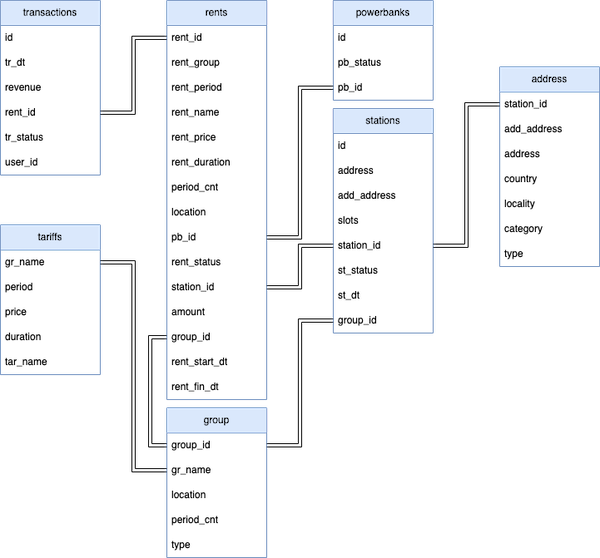

In [58]:
# для локального изображения можно использовать такой код:
Image("chargex.png")

<a id='anchor_3'></a>
## Исследовательский анализ данных (EDA)

Так как нам необходимо проанализировать заведения и установить, где терминалы для пауер-банков быстрее окупаются, сосредоточим внимание на следующих таблицах:  
- transactions - хранит операции о полученной выручке,  
- rents - соединяет транзакции со станциями,  
- stations - характеристики станций,   
- address - дополнительная информация о заведениях.

Выполним постепенное соединение таблиц. Сначала отфильтруем только транзакции со статусом 'DEBIT':

In [59]:
df = transactions.loc[transactions['tr_status'] == 'DEBIT'][['tr_dt', 'revenue', 'rent_id', 'user_id']]
df.sample(5)

,tr_dt,revenue,rent_id,user_id
85079,2021-06-28 07:03:30.543,0.00,60d1b54bc4685d1c3aa14640,6089a3e938bfda6970ce3fc5
683786,2022-10-29 10:28:06.277,0.00,62b8cd472192187e33c8187a,62b8cc422192187e33c8186b
744127,2022-11-14 15:57:03.280,0.00,62a2d98a021ff5765e6e2d74,6263666dacc7b52f05969f4e
655685,2022-10-22 09:42:19.997,0.00,634fefccdde2ed1db810e77b,61d83fe8a3b0cc14c1773c79
332086,2022-03-05 14:23:08.088,50.00,6223723e0115b47df33eb218,61ab8bf43f558a2354b8787c


Посмотрим, за какой период в таблице приведены операции:

In [60]:
print('Миимальная дата:', min(df['tr_dt']))
print('Максимальная дата:', max(df['tr_dt']))

Миимальная дата: 2020-05-27 10:49:13.374000
Максимальная дата: 2022-11-15 11:49:11.637000


Обратимся к таблице с арендами, присоединим айдишки станций и локацию:

In [61]:
df = df.merge(rents, on='rent_id', how = 'left')
df.sample(5)

,tr_dt,revenue,rent_id,user_id,rent_group,rent_period,rent_name,rent_price,rent_duration,period_cnt,location,group_id,pb_id,rent_status,rent_fin_dt,rent_start_dt,station_id,amount
112004,2021-10-12 08:48:34.418,100.00,61654bd46d515855f55ec8d9,6162c1a46d515855f55eb053,NaN,1.00,100₽/сутки,100.00,30 DAY,1.00,RU,6038dea33d18b03b58d8a749,5063825300585972736.00,FINISHED,2021-10-12 17:56:59.279,2021-10-12 08:48:20.937,FFRH082107020057,100.00
174626,2022-02-22 16:32:20.893,100.00,620fc9f73644c71b971ed2d9,620fc9f63644c71b971ed2d6,NaN,1.00,100₽/сутки,100.00,30 DAY,1.00,RU,6038dea33d18b03b58d8a749,5063825300585972736.00,FINISHED,2022-02-23 19:24:25.928,2022-02-18 16:31:51.525,FFRH082008800026,600.00
69976,2021-08-02 08:40:36.281,100.00,6107af7ee53a81356696a9b8,60700f7d8a68ae7e3277b1d0,NaN,1.00,100₽/сутки,100.00,30 DAY,1.00,RU,6038dea33d18b03b58d8a749,5930171193822806016.00,FINISHED,2021-08-13 13:27:30.061,2021-08-02 08:40:30.731,FFRH042012250004,1100.00
35989,2021-06-05 07:06:48.505,50.00,60bafa39bd2c5161e5b59c53,60baf9d8bd2c5161e5b59c49,Рублёвый. 30 минут бесплатно; 50₽/час; 100₽/сутки,2.00,50₽/час,50.00,1 HOUR,3.00,RU,6038e07a3d18b03b58d8a758,5930171193772474368.00,FINISHED,2021-06-05 04:52:12.266,2021-06-05 04:14:49.594,FFRH082006850023,50.00
177477,2022-02-26 17:05:15.082,50.00,621a4faa0115b47df33e3b60,6216a3cd7dd6944bb7d6e8f5,Рублёвый. Час и сутки с бесплатным периодом.,3.00,Рублёвый. Час и сутки с бес. - 100₽/сутки,100.00,30 DAY,3.00,RU,5f71d09e2ab79c0006b29607,5930171193822807040.00,FINISHED,2022-02-26 18:13:00.053,2022-02-26 16:04:58.928,FFRH082006640006,100.00


In [62]:
df = df[['tr_dt', 'revenue', 'user_id', 'location', 'station_id']]
df.sample(1)

,tr_dt,revenue,user_id,location,station_id
135275,2021-12-08 18:46:41.011,150.00,61b0ef7d3f558a2354b8aa0b,RU,FFRH242109650003


Дополним таблицу информацией о станциях:

In [63]:
df = df.merge(stations, on='station_id', how = 'left')
df.sample(5)

,tr_dt,revenue,user_id,location,station_id,id,group_id,address,add_address,st_dt,slots,st_status
394697,2022-11-10 09:42:46.277,0.00,5fedaa5ce38b4e6ed108468f,RU,FFRH082006680048,5f38232a24aa9a0007fa3817,6038dea33d18b03b58d8a749,"г Владикавказ, ул Максима Горького, д 11",ресторан Vincenzo,2021-12-01 17:49:04.701,8.00,CONNECTED
166855,2022-02-09 11:01:06.076,0.00,602eaa2dab85b05a5d3640ec,RU,DONB091901480030,5f929f64a255213aa43e1f37,5f71d0342ab79c0006b29604,"Ростов-на-Дону,Театральный 47",Пить Кофе,2022-04-05 08:29:49.182,9.00,DISCONNECTED
83337,2021-08-23 18:33:50.155,50.00,60f8604edc6f9a2c440d3d9b,RU,RL3H081904630004,630894a85a89a24ec1a5045a,6038e0083d18b03b58d8a755,"г Санкт-Петербург, г Колпино, б-р Трудящихся, ...",Ai Fitness,2022-08-26 10:15:33.268,8.00,DISCONNECTED
228589,2022-06-14 17:14:39.202,100.00,60d9cf8d4ab8dc2c1e58cde9,RU,FFRH082006250016,5f2ee14224aa9a0006ac6f3a,6024410c9613645c721cc344,"Кабардино-Балкарская Республика, Нальчик, прос...",Веранда Бранч,2022-03-08 06:10:35.764,8.00,CONNECTED
290085,2022-09-04 18:10:24.388,100.00,617c26df013c3b3154170162,RU,FFRH042012620014,606c4aef8a68ae7e32779dbd,6038dea33d18b03b58d8a749,"Ставропольский край, г Кисловодск, ул Марцинке...",Паровоз,2022-04-06 11:54:01.299,4.00,CONNECTED


In [64]:
df = df[['tr_dt', 'revenue', 'user_id', 'location', 'station_id', 'address', 'add_address', 'slots', 'st_status']]
df.sample(1)

,tr_dt,revenue,user_id,location,station_id,address,add_address,slots,st_status
140518,2021-12-20 21:06:56.598,100.00,61154e263f80bc3541e59bc4,RU,FFRH042012020010,"Москва, Ходынский б-р, д 20А",Раковая на Ходынке,4.00,CONNECTED


И дополним таблицу информацией об объектах:

In [65]:
df = df.merge(address[['station_id', 'country', 'locality', 'category', 'type']],
              on='station_id', how = 'left')
df.sample(5)

,tr_dt,revenue,user_id,location,station_id,address,add_address,slots,st_status,country,locality,category,type
408399,2022-11-14 15:57:38.967,0.00,617c4ef6013c3b31541704ba,RU,FFRH082107890089,"Россия, Краснодарский край, городской округ Со...","2350 ""Утомленные солнцем"" отель",8.00,CONNECTED,Россия,Краснодарский край,Гостиница,туризм
82186,2021-08-22 16:53:26.861,100.00,610ebcd61106343d374489f5,RU,FFRH082008080095,"Кабардино-Балкарская Республика, Эльбрусский р...",Кафе Азау Cтар,8.00,DISCONNECTED,Россия,Кабардино-Балкарская Республика,Гостиница,туризм
44503,2021-06-23 19:04:14.388,0.00,60d0aa71c4685d1c3aa13d65,RU,FFRH042011010005,"Якутск, ул Ярославского, д 26",Кофейня Вафли coffee,4.00,CONNECTED,Россия,Республика Саха (Якутия),Кофейня,общепит
9848,2021-01-03 19:00:35.213,0.00,5f66317c24aa9a0006af05fa,RU,FFRH082006200011,"Россия, Ставрополь, улица Тухачевского, 15/1",Бар с пивом и песнями Петровичъ,8.00,CONNECTED,Россия,Ставропольский край,Ресторан,общепит
168065,2022-02-11 17:19:14.924,100.00,62069a833644c71b971e48f1,RU,FFRH042108250015,"Россия, Мурманск, улица Полярные Зори, 49к2","Тундра Gril & Bar Ресторан,Кафе,Бар,Паб",4.00,CONNECTED,Россия,Мурманская область,Не определен,другое


Посмотрим общую информацию о полученной таблице:

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409192 entries, 0 to 409191
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tr_dt        409192 non-null  datetime64[ns]
 1   revenue      409192 non-null  float64       
 2   user_id      409191 non-null  object        
 3   location     408369 non-null  object        
 4   station_id   408369 non-null  object        
 5   address      392929 non-null  object        
 6   add_address  392929 non-null  object        
 7   slots        392929 non-null  float64       
 8   st_status    392929 non-null  object        
 9   country      392929 non-null  object        
 10  locality     392929 non-null  object        
 11  category     392929 non-null  object        
 12  type         392929 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 43.7+ MB


Мы видим, что в массиве есть транзакции без информации о станции или адресе. Такая информация является ключевой в текущем исследовании. Таким образом, целесообразно удалить строки с пропусками (занимают меньше 4% от всего массива):

In [67]:
df = df.loc[df['address'].isna() != True]
len(df)

392929

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392929 entries, 9 to 409191
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tr_dt        392929 non-null  datetime64[ns]
 1   revenue      392929 non-null  float64       
 2   user_id      392928 non-null  object        
 3   location     392929 non-null  object        
 4   station_id   392929 non-null  object        
 5   address      392929 non-null  object        
 6   add_address  392929 non-null  object        
 7   slots        392929 non-null  float64       
 8   st_status    392929 non-null  object        
 9   country      392929 non-null  object        
 10  locality     392929 non-null  object        
 11  category     392929 non-null  object        
 12  type         392929 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 42.0+ MB


In [69]:
df['location'].unique()

array(['RU', 'BY'], dtype=object)

Посмотрим, какие страны представлены в данных:

In [70]:
df['country'].unique()

array(['Россия', 'Казахстан', 'Армения', 'Боливия', 'Беларусь'],
      dtype=object)

Нашли противоречие в данных. Индексы локаций имеются лишь по двум странам. Изучим несоответствие:

In [71]:
df.loc[df['country'] == 'Казахстан']['address'].unique()

array(['Казахстан, Нур-Султан (Астана), проспект Туран, 37',
       'Казахстан, Нур-Султан (Астана), проспект Кабанбай Батыра, 58Бк3',
       'Казахстан, Нур-Султан (Астана), проспект Республики, 9/3',
       'Казахстан, Нур-Султан (Астана), улица Александра Пушкина, 9'],
      dtype=object)

In [72]:
len(df.loc[df['country'] == 'Казахстан'])

72

In [73]:
df.loc[df['country'] == 'Казахстан']['st_status'].unique()

array(['DISCONNECTED'], dtype=object)

Только 72 записи по Казахстану, очень мало для исследования. Кроме того, все станции там отключены. Изучать Казахстан пока смысла мало. Посмотрим Армению:

In [74]:
df.loc[df['country'] == 'Армения']['address'].unique()

array(['Маралик', 'Армения,  Гюмри'], dtype=object)

In [75]:
len(df.loc[df['country'] == 'Армения'])

205

In [76]:
df.loc[df['country'] == 'Армения']['st_status'].unique()

array(['DISCONNECTED'], dtype=object)

Картина аналогичная. Присутствие Боливии в данных похоже на ошибку. Проверим:

In [77]:
df.loc[df['country'] == 'Боливия']['address'].unique()

array(['г Ставрополь, Петрович в Парке'], dtype=object)

Действительно адрес соответствует России. Произведём замену, удалим из массива лишние регионы:

In [78]:
df.loc[df['country'] == 'Боливия', 'country'] = 'Россия'
df = df.loc[(df['country'] == 'Россия') | (df['country'] == 'Беларусь')]
df['country'].unique()

array(['Россия', 'Беларусь'], dtype=object)

Сгруппируем данные по станциям, выясним общую выручку и период работы станций:

In [79]:
agr_st = df.groupby(by = ['station_id', 'address', 'country', 'locality', 'category', 'type', 'slots', 'st_status'],
           as_index=False).agg({'tr_dt':['min', 'max'], 'revenue':'sum', 'user_id':['nunique', 'count']})
agr_st.columns = ['station_id', 'address', 'country', 'locality', 'category', 'type', 'slots', 'status', 'min_dt', 
                 'max_dt', 'revenue', 'user_cnt', 'tr_cnt']
agr_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   station_id  881 non-null    object        
 1   address     881 non-null    object        
 2   country     881 non-null    object        
 3   locality    881 non-null    object        
 4   category    881 non-null    object        
 5   type        881 non-null    object        
 6   slots       881 non-null    float64       
 7   status      881 non-null    object        
 8   min_dt      881 non-null    datetime64[ns]
 9   max_dt      881 non-null    datetime64[ns]
 10  revenue     881 non-null    float64       
 11  user_cnt    881 non-null    int64         
 12  tr_cnt      881 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 89.6+ KB


In [80]:
agr_st['st_duration'] = agr_st['max_dt'] - agr_st['min_dt']
agr_st['min_dt'] = agr_st['min_dt'].dt.date
agr_st['max_dt'] = agr_st['max_dt'].dt.date
agr_st['st_duration'] = agr_st['st_duration'].dt.days
agr_st.sample(5)

,station_id,address,country,locality,category,type,slots,status,min_dt,max_dt,revenue,user_cnt,tr_cnt,st_duration
399,FFRH042108810165,"Россия, Республика Татарстан, Набережные Челны...",Россия,Республика Татарстан,Кафе,общепит,4.00,CONNECTED,2022-07-29,2022-09-29,500.00,5,5,62
195,FFRH042108050286,"Самара, Молодогвардейская улица, 143",Россия,Самарская область,"Бар, паб",общепит,4.00,DISCONNECTED,2022-08-02,2022-10-20,3000.00,1,5,78
589,FFRH082008490005,"г Мурманск, ул Рогозерская, д 4",Россия,Мурманская область,Торговый центр,магазины,8.00,CONNECTED,2020-11-14,2022-11-10,40850.00,291,714,726
750,FFRH082111200205,"Беларусь, г Минск, ул Октябрьская, д 21",Беларусь,Минск,Суши-бар,общепит,8.00,DISCONNECTED,2022-04-21,2022-11-14,150.00,34,251,207
846,FFRH082111860289,"Россия, Нижний Новгород, Алексеевская улица, 15",Россия,Нижегородская область,Кафе,общепит,8.00,CONNECTED,2022-02-09,2022-11-14,3900.00,26,169,278


В силу того, что в массиве имеется информация о двух странах, нам необходимо привести стоимостные показатели (revenue) к сопоставимому виду, используем коэффициент конверсии:

In [81]:
# курс взят с myfin.by по состоянию на 18.02.2023г.
koef = 26.56
agr_st.loc[agr_st['country'] == 'Беларусь', 'revenue'] = agr_st['revenue']*koef
agr_st.loc[agr_st['country'] == 'Беларусь'].sample(5)

,station_id,address,country,locality,category,type,slots,status,min_dt,max_dt,revenue,user_cnt,tr_cnt,st_duration
783,FFRH082111470185,"Беларусь, г Минск, ул Притыцкого, д 97Б",Беларусь,Минск,Кофейня,общепит,8.00,CONNECTED,2022-05-19,2022-11-14,7569.60,51,460,179
231,FFRH042108200201,"Беларусь, г Минск, ул Кальварийская, д 21/1",Беларусь,Минск,Быстрое питание,общепит,4.00,DISCONNECTED,2022-08-25,2022-09-21,464.80,3,7,26
750,FFRH082111200205,"Беларусь, г Минск, ул Октябрьская, д 21",Беларусь,Минск,Суши-бар,общепит,8.00,DISCONNECTED,2022-04-21,2022-11-14,3984.00,34,251,207
833,FFRH082111830204,"Беларусь, г Минск, ул Энгельса, д 3",Беларусь,Минск,Кафе,общепит,8.00,CONNECTED,2022-04-01,2022-11-14,1792.80,15,140,227
342,FFRH042108630198,"220013, Беларусь, г Минск, ул Якуба Коласа, д 3",Беларусь,Минск,Быстрое питание,общепит,4.00,CONNECTED,2022-03-02,2022-11-06,664.00,6,10,248


Chargex на своём сайте предоставляет информацию о 4-х видах станций: на 4, 8, 24 и 48 пауэрбанка. Посмотрим, какие станции присутствуют в массиве:

In [82]:
agr_st['slots'].unique()

array([24.,  3.,  9.,  4.,  8.])

Среди актуальных моделей станций, предлагаемых Chargex, нет вариантов на 3 или 9 устройств. Произведём допущение - приравняем их к станциям на 4 и 8 "банков" соответственно. Чтобы оценить выгоду установки станций обратимся к информации об их стоимости:

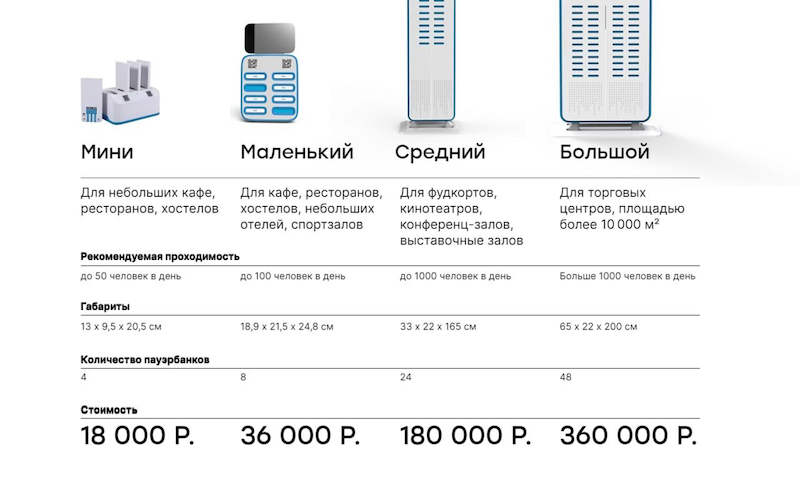

In [83]:
Image("stations.png")

Дополним таблицу информацией о стоимости станций, проценте окупленности, размере выручки с одного пользователя и с одной транзакции:

In [84]:
agr_st.loc[(agr_st['slots'] == 3) | (agr_st['slots'] == 4), 'st_price'] = 18000
agr_st.loc[(agr_st['slots'] == 8) | (agr_st['slots'] == 9), 'st_price'] = 36000
agr_st.loc[agr_st['slots'] == 24, 'st_price'] = 180000
agr_st['profit_percent'] = round(agr_st['revenue']*100/agr_st['st_price'], 2)
agr_st['rev_per_user'] = round(agr_st['revenue']/agr_st['user_cnt'], 2)
agr_st['rev_per_tr'] = round(agr_st['revenue']/agr_st['tr_cnt'], 2)
agr_st.sample(5)

,station_id,address,country,locality,category,type,slots,status,min_dt,max_dt,revenue,user_cnt,tr_cnt,st_duration,st_price,profit_percent,rev_per_user,rev_per_tr
800,FFRH082111630217,"г Владикавказ, ул Коцоева, д 75",Россия,Республика Северная Осетия — Алания,Ресторан,общепит,8.00,CONNECTED,2022-02-04,2022-11-12,23500.00,93,257,281,36000.00,65.28,252.69,91.44
128,FFRH042012620014,"Ставропольский край, г Кисловодск, ул Марцинке...",Россия,Ставропольский край,Памятник технике,другое,4.00,CONNECTED,2021-04-07,2022-11-14,35350.00,63,278,586,18000.00,196.39,561.11,127.16
546,FFRH082008040042,"Респ Крым, г Симферополь, ул Гагарина, д 6",Россия,Республика Крым,"Автовокзал, автостанция",туризм,8.00,CONNECTED,2021-01-25,2022-11-14,31100.00,249,653,658,36000.00,86.39,124.90,47.63
858,FFRH242111600005,"Астрахань, Аэропортовский проезд, 1с2",Россия,Астраханская область,Не определен,другое,24.00,CONNECTED,2022-02-23,2022-11-15,28100.00,119,449,264,180000.00,15.61,236.13,62.58
828,FFRH082111800210,"Беларусь, г Минск, ул Максима Богдановича, д 78",Беларусь,Минск,Не определен,другое,8.00,DISCONNECTED,2022-04-08,2022-10-28,265.60,2,4,202,36000.00,0.74,132.80,66.40


Стоит заметить, что в данных может быть отражена информация о только что установленных станциях - они, очевидно, ещё не успели найти свою аудиторию и окупиться. Посмотрим, сколько станций проработали меньше месяца и, если таких немного, уберём их из исследования как пока неактуальные:

In [85]:
len(agr_st.loc[agr_st['st_duration'] <= 30])

21

In [86]:
agr_st = agr_st.loc[agr_st['st_duration'] > 30]

Изучим описательные характеристики полученных метрик:

In [87]:
agr_st[['slots', 'min_dt', 'max_dt', 'revenue', 'user_cnt', 'tr_cnt', 'st_duration', 'profit_percent',
       'rev_per_user', 'rev_per_tr']].describe().T

,count,mean,std,min,25%,50%,75%,max
slots,860.00,6.51,3.39,3.00,4.00,8.00,8.00,24.00
revenue,860.00,27374.28,48599.37,77.00,4581.60,12300.00,29737.50,513600.00
user_cnt,860.00,129.34,204.86,1.00,26.00,64.00,147.00,2203.00
tr_cnt,860.00,456.44,678.47,2.00,76.00,232.00,554.00,6637.00
st_duration,860.00,420.60,198.22,44.00,275.00,403.00,580.25,879.00
profit_percent,860.00,82.72,107.98,0.21,18.89,48.48,99.72,1310.00
rev_per_user,860.00,217.63,191.42,25.67,136.84,179.61,239.18,3000.00
rev_per_tr,860.00,66.01,34.90,1.01,43.95,63.23,91.50,600.00


Итак, предварительно мы можем заключить:
- 50% станций расчитаны на 8 и более пауэрбанков,
- средний уровень выручки от станции составляет 27 374 рубль, медианный - 12 300 рублей, максимальный - 513 600 рублей, то есть разброс большой,
- среднее количество уникальных пользователей на станции 129 человек, а половину станций посетили до 64 человек,
- среднее количество транзакций на станции 457,
- среднее время работы станций - 421 день,
- большинство станций не окупили затраты на них. Однако есть такие станции, выручка по которым в 13 раз превысила затраты на их установку,
- выручка с одного пользователя в среднем больше, чем в 3 раза превышает выручку от одной транзакции - некоторые пользователи прибегают к услугам зарядных станций больше одного раза.

<a id='anchor_4'></a>
## Проверка гипотез

Перед нами стоит задача категоризации заведений, в которых стоят точки для аренды пауер-банка. Необходимо выяснить, в каких из них терминалы для пауер-банков быстрее окупаются, построить и проверить гипотезы о целевой аудитории заказчика, предложить пути развития бизнеса.  
Построим несколько визуализаций и проверим гипотезы:
1) в России и в Беларуси окупаемость станций проявляет себя по-разному,  
2) тип заведения влияет на окупаемость станций (опять же внутри каждой страны своё сравнение),  
3) различным типам заведений подходят  разные виды станций (по количеству слотов).

Начнём со сравнения по странам:

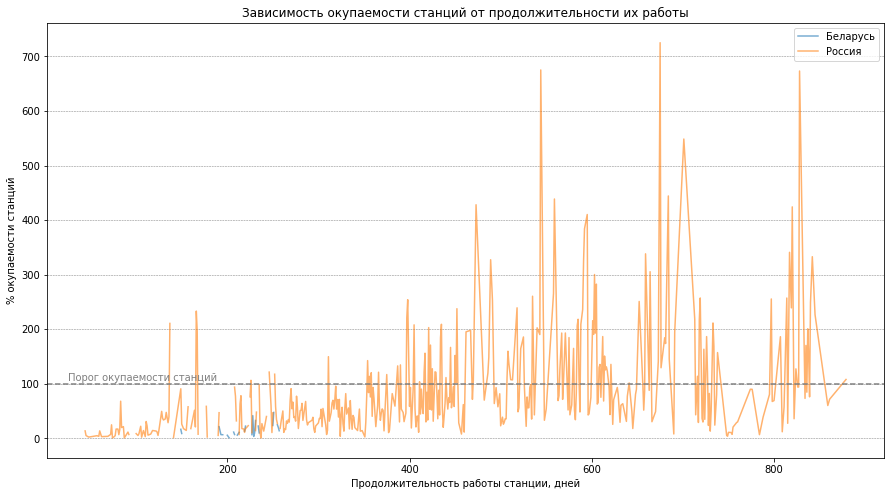

In [88]:
agr_st.groupby(['country', 'st_duration'])['profit_percent'].mean().unstack('country').plot(figsize=(15,8), alpha=0.6)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axhline(y=100, color='grey', linestyle='--')
plt.text(25, 105, 'Порог окупаемости станций', color='grey')
plt.legend()
plt.title('Зависимость окупаемости станций от продолжительности их работы')
plt.xlabel('Продолжительность работы станции, дней')
plt.ylabel('% окупаемости станций')
# сохраним график в файл для будущей презентации
plt.savefig('plot_countries_one.png');

Ситуация по Беларуси на этом графике считывается плохо. Однако, можно заметить, что продолжительность работы станций здесь меньше - вероятно, Chargex не так давно "пришёл" в Беларусь. Добавим ограничение по осям, чтобы детальнее посмотреть этот регион:

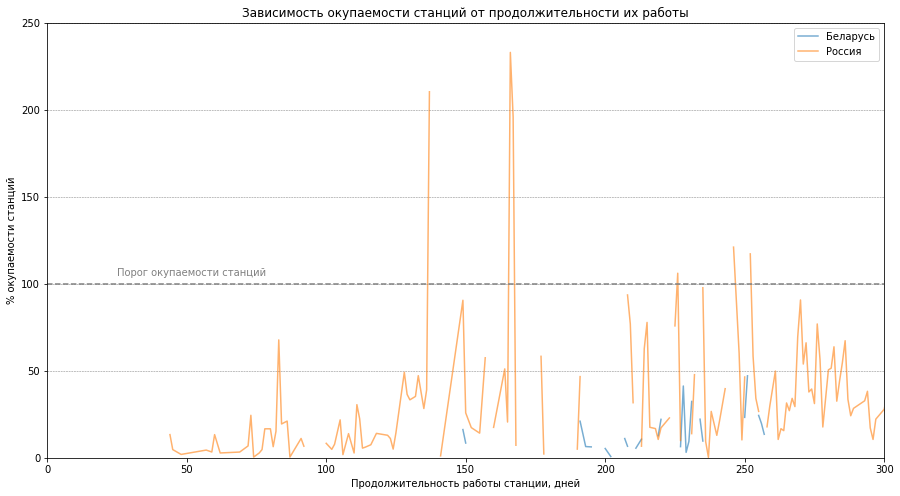

In [89]:
agr_st.groupby(['country', 'st_duration'])['profit_percent'].mean().unstack('country').plot(
    figsize=(15,8), alpha=0.6)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlim([0, 300])
plt.ylim([0, 250])
plt.axhline(y=100, color='grey', linestyle='--')
plt.text(25, 105, 'Порог окупаемости станций', color='grey')
plt.legend()
plt.title('Зависимость окупаемости станций от продолжительности их работы')
plt.xlabel('Продолжительность работы станции, дней')
plt.ylabel('% окупаемости станций')
# сохраним график в файл для будущей презентации
plt.savefig('plot_countries_two.png');

Можем заметить, что окупаемость показывает себя неоднозначно в обоих регионах. Вместе с тем, станции гораздо чаще окупаются после 400 дней работы, а в Беларуси станции работают меньше. По данным графикам можно заключить, что на окупаемость станций оказывают влияние и другие факторы. Изучим типы заведений в России (с дополнительным параметром - число слотов станции):

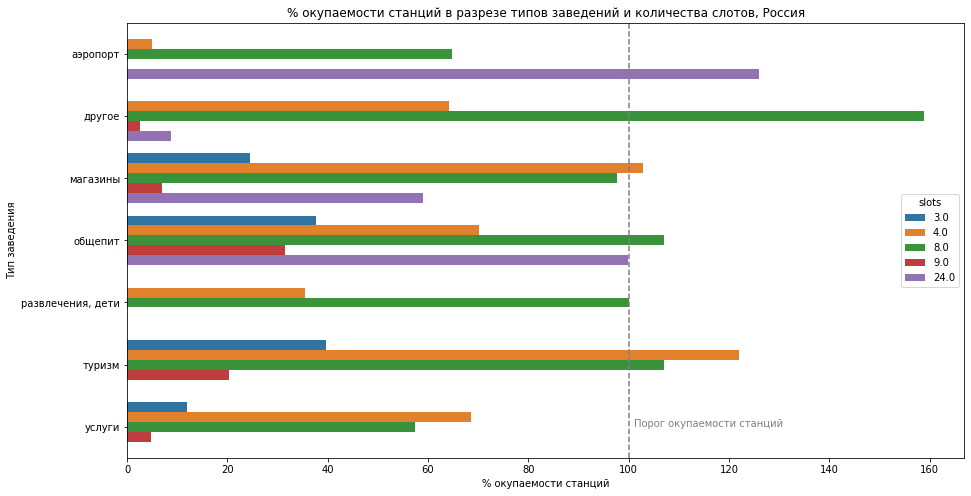

In [90]:
ru_types = agr_st.loc[agr_st['country'] == 'Россия'].groupby(
    by=['type','slots'], as_index=False).agg({'profit_percent':'mean'})
plt.figure(figsize=(15, 8))
sns.barplot(x='profit_percent', y='type', hue='slots', data=ru_types)
plt.axvline(x=100, color='grey', linestyle='--')
plt.text(101, 6, 'Порог окупаемости станций', color='grey')
plt.title('% окупаемости станций в разрезе типов заведений и количества слотов, Россия')
plt.xlabel('% окупаемости станций')
plt.ylabel('Тип заведения')
# сохраним график в файл для будущей презентации
plt.savefig('plot_ru_types.png');

Можем заметить, что чаще других окупаются станции на 8 пауэр-банков. В магазинах и в туризме хорошо себя показывают станции на 4 устройства. Большие станции на 24 "банка" успешны в аэропортах. В сфере услуг станции не окупаются.  
Можно "провалиться" в любой из типов заведений и узучить фактор окупаемости в более узких группах. Рассмотрим на примере объектов общепита:

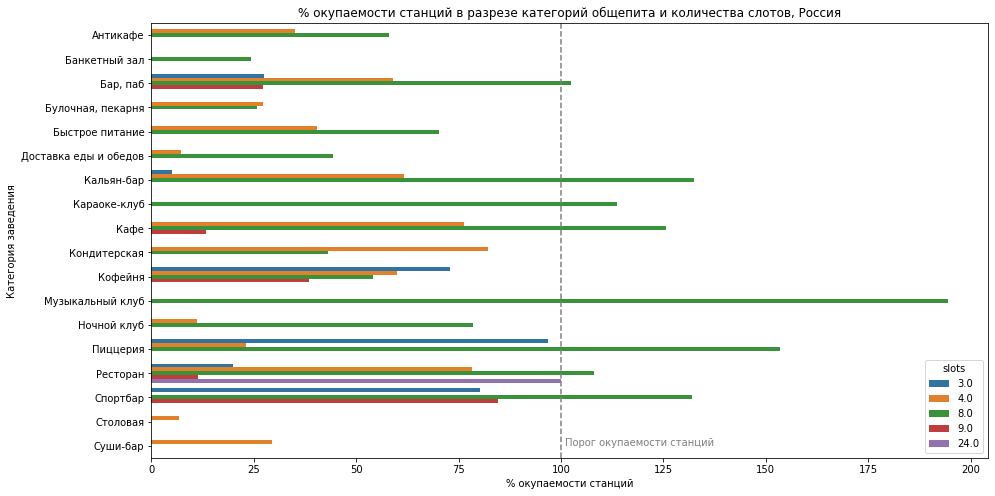

In [91]:
ru_food_cat = agr_st.loc[(agr_st['country'] == 'Россия') & (agr_st['type'] == 'общепит')].groupby(
    by=['category','slots'], as_index=False).agg({'profit_percent':'mean'})
plt.figure(figsize=(15, 8))
sns.barplot(x='profit_percent', y='category', hue='slots', data=ru_food_cat)
plt.axvline(x=100, color='grey', linestyle='--')
plt.text(101, 17, 'Порог окупаемости станций', color='grey')
plt.title('% окупаемости станций в разрезе категорий общепита и количества слотов, Россия')
plt.xlabel('% окупаемости станций')
plt.ylabel('Категория заведения')
# сохраним график в файл для будущей презентации
plt.savefig('plot_ru_food.png');

Мы видим, что очень хорошо себя показывают станции на 8 устройств в музыкальных клубах, пиццериях, спортбарах, кальян-барах и кафе.

Посмотрим, как зависит окупаемость станций в заведениях общепита России от продолжительности работы этих станций:

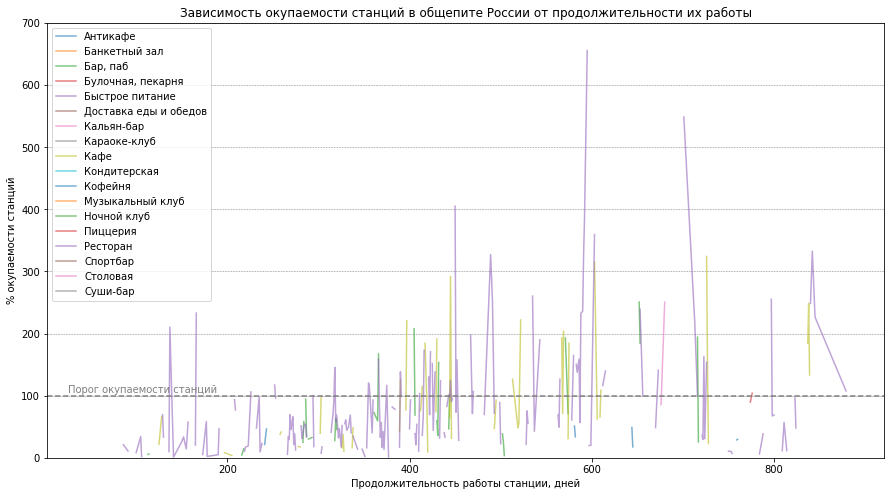

In [92]:
agr_st.loc[(agr_st['country'] == 'Россия') & (agr_st['type'] == 'общепит')].groupby(
    ['category', 'st_duration'])['profit_percent'].mean().unstack('category').plot(
    figsize=(15,8), alpha=0.6)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim([0, 700])
plt.axhline(y=100, color='grey', linestyle='--')
plt.text(25, 105, 'Порог окупаемости станций', color='grey')
plt.legend()
plt.title('Зависимость окупаемости станций в общепите России от продолжительности их работы')
plt.xlabel('Продолжительность работы станции, дней')
plt.ylabel('% окупаемости станций')
# сохраним график в файл для будущей презентации
plt.savefig('plot_ru_food_cat.png');

Из графика видно, что станции чаще окупаются после года работы.

Изучим типы заведений в Беларуси (с дополнительным параметром - число слотов станции):

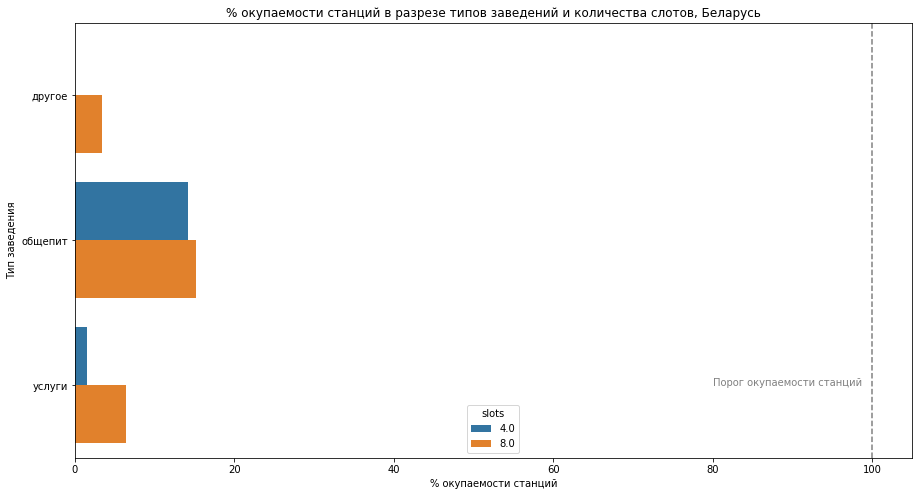

In [93]:
ru_types = agr_st.loc[agr_st['country'] == 'Беларусь'].groupby(
    by=['type','slots'], as_index=False).agg({'profit_percent':'mean'})
plt.figure(figsize=(15, 8))
sns.barplot(x='profit_percent', y='type', hue='slots', data=ru_types)
plt.axvline(x=100, color='grey', linestyle='--')
plt.text(80, 2, 'Порог окупаемости станций', color='grey')
plt.title('% окупаемости станций в разрезе типов заведений и количества слотов, Беларусь')
plt.xlabel('% окупаемости станций')
plt.ylabel('Тип заведения')
# сохраним график в файл для будущей презентации
plt.savefig('plot_by_types.png');

Наши выводы по Беларуси подтверждаются - станции пока не окупились. Посмотрим, какова средняя продолжительность работы станций в Беларуси:

In [94]:
agr_st.loc[agr_st['country'] == 'Беларусь']['st_duration'].mean()

209.2340425531915

In [95]:
agr_st.loc[agr_st['country'] == 'Россия']['st_duration'].mean()

432.81426814268144

Станции в Беларуси в среднем работают около 7 месяцев, что вдвое меньше аналогичного показателя по РФ. Посмотрим подробнее общепит Беларуси:

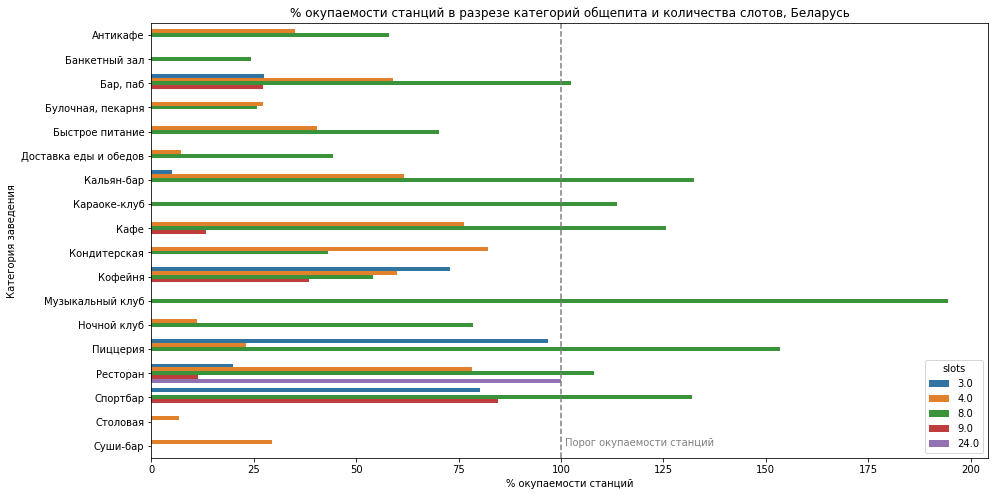

In [96]:
by_food_cat = agr_st.loc[(agr_st['country'] == 'Беларусь') & (agr_st['type'] == 'общепит')].groupby(
    by=['category','slots'], as_index=False).agg({'profit_percent':'mean'})
plt.figure(figsize=(15, 8))
sns.barplot(x='profit_percent', y='category', hue='slots', data=ru_food_cat)
plt.axvline(x=100, color='grey', linestyle='--')
plt.text(101, 17, 'Порог окупаемости станций', color='grey')
plt.title('% окупаемости станций в разрезе категорий общепита и количества слотов, Беларусь')
plt.xlabel('% окупаемости станций')
plt.ylabel('Категория заведения')
# сохраним график в файл для будущей презентации
plt.savefig('plot_by_food.png');

Картина Беларуси внутри сферы общепита очень похожа на картину по России. Окупаются 8-мислотовые станции в музыкальных клубах, пиццериях, спортбарах, кальян-барах и кафе. Таким образом, можно давать рекоммендацию продвижения таких станций как в заведениях общепита Беларуси, так и России.

<a id='anchor_5'></a>
## Общий вывод и рекомендации

В рамках текущего исследования мы изучили большое количество данных, характеризующих работу уже установленных станций зарядных устройств Chargex.

Наиболее окупаемой и популярной моделью является восьмислотовая станция. Большие станции на 24 устройства отлично себя показывают в аэропортах. Можно предположить, что их выгодно продвигать в местах больших скоплений людей (например, большие торговые центры или развлекательные комплексы.  
Исследованные данные показали, что после года работы станции чаще окупаются. Здесь можно предложить переход на станции поменьше (вместо 12-тислотовых использовать 8-мислотовые и 4-слотовые).  
Перспективными для продвижения станций являются объекты общепита. А именно: музыкальные клубы, спортбары, кальян-бары, пиццерии и кафе. В таких заведениях молодые люди проводят большое количество времени, т.е достаточное, чтобы их устройства успели разрядиться.  
Успех зарядных станций в аэропортах выглядит логичным. Люди проводят много времени в дороге и нуждаются в зарядке своих гаджетов. Таким образом, логично продвигать сервис и в других туристических местах (станции на 4 и на 8 устройств здесь себя тоже хорошо показывают).

<a id='anchor_6'></a>
## Предложения для дополнительных исследований

В процессе данного исследования возник ряд идей для проверки гипотез:
- изучить фактор окупаемости в разрезе городов/областей,
- категоризовать все транзакции по временам года, исследовать сезонность как по всему массиву, так и в разрезе типов заведений. Не исключена ситуация, что летом станции лучше себя показывают, например, на пляжах или в парках, а зимой - в барах. Выводы по проверке данной гипотезы можно учитывать при запуске рекламных кампаний,
- исследовать тарифы. Найти те тарифы, которые приносят наибольшую выгоду и их продвигать,
- изучить информацию об отключенных станциях, разобраться в причинах их отключения,
- исследовать другие метрики. Например, сравнить среднюю выручку с уникального пользователя и с транзакции. Установить, в каких заведениях пользователи чаще возвращаются. Установить, каков процент повторных пользователей и разработать стратегию по привлечению таких пользователей.